f(1.416) = 0.8893592739532626
f(1.456) = 0.8894275827478966

f(1.431) = 0.8893851608897109
f(1.462) = 0.8894376275857991

f(1.422) = 0.8893696673011168
f(1.451) = 0.8894191714964221



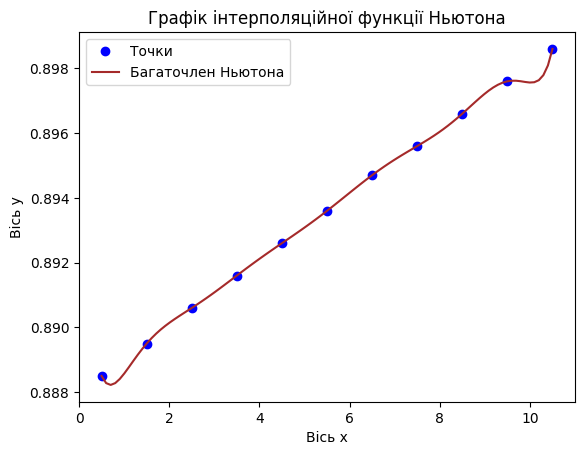

In [19]:
import numpy as np
import matplotlib.pyplot as plt

# Точки
x = np.array ([i+0.5 for i in range(0, 11)])
y = np.array([0.8885, 0.8895, 0.8906, 0.8916, 0.8926, 0.8936, 0.8947, 0.8956, 0.8966, 0.8976, 0.8986])

# Перша інтерполяція
def first_interpolation(x, y, x0):
  n = len(x)
  f = np.zeros((n, n))
  f[:, 0] = y

  for j in range(1, n):
    for i in range(n - j):
      f[i, j] = (f[i+1, j-1] - f[i, j-1]) / (x[i+j] - x[i])

  ans = 0
  for j in range(n):
    prod = f[0, j]
    for i in range(j):
      prod *= (x0 - x[i])
    ans += prod

  return ans

# Друга інтерполяція
def second_interpolation(x, y, x0):
  n = len(x)
  f = np.zeros((n, n))
  f[:, 0] = y

  for j in range(1, n):
    for i in range(n - j):
      f[i, j] = (f[i+1, j-1] - f[i, j-1]) / (x[i+j] - x[i])

  ans = f[0, 0]
  for j in range(1, n):
    prod = f[0, j]
    for i in range(j):
      prod *= (x0 - x[i])
    ans += prod

  return ans

# Значення функції в точках x = 1.416 та x = 1.456
x1 = 1.416
x2 = 1.456
y1 = first_interpolation(x, y, x1)
y2 = second_interpolation(x, y, x2)
print(f"f({x1}) = {y1}")
print(f"f({x2}) = {y2}")
print()

# Значення функції в точках x = 1.431 та x = 1.462
x1 = 1.431
x2 = 1.462
y1 = first_interpolation(x, y, x1)
y2 = second_interpolation(x, y, x2)
print(f"f({x1}) = {y1}")
print(f"f({x2}) = {y2}")
print()

# Значення функції в точках x = 1.422 та x = 1.451
x1 = 1.422
x2 = 1.451
y1 = first_interpolation(x, y, x1)
y2 = second_interpolation(x, y, x2)
print(f"f({x1}) = {y1}")
print(f"f({x2}) = {y2}")
print()

# Графік інтерполяційної функції
xx = np.linspace(np.min(x), np.max(x), 100)
yy = np.zeros_like(xx)
for i in range(len(xx)):
 yy[i] = second_interpolation(x, y, xx[i])
plt.plot(x, y, 'o', color = 'blue', label='Точки')
plt.plot(xx, yy, color = 'brown', label="Багаточлен Ньютона")
plt.title("Графік інтерполяційної функції Ньютона")
plt.xlabel("Вісь x")
plt.ylabel("Вісь y")
plt.legend()
plt.show()